In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

# for pretty plotting
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [3]:
rio = pd.read_csv('data/mobility_rio_final.csv')
ratio = pd.read_csv('data/mobility_ratios.csv')

In [6]:
favelas = rio[rio['type'] == 'favela']
formal = rio[rio['type'] == 'formal']

In [7]:
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464


In [38]:
# create % walk time
rio['walk_per'] = rio['walk_time']/rio['travel_time_am']
rio['walk_scale'] = rio.walk_per * 20 # scale factor

# create weekly cost (5 rides) 
rio['wkly_cost_am'] = rio['price']*5

# create % income for 5 rides
rio['income_per'] = rio['wkly_cost_am']/rio['avg_income']

# creating mobility score (raw)
rio['mobility_score'] = rio['travel_time_am']*rio['income_per']+rio['walk_per']

# take a look
rio

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents,walk_per,wkly_cost_am,income_per,mobility_score,walk_scale,mobility_score_norm
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515,0.037736,75.0,0.140819,14.964510,0.754717,3.534134
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163,0.060606,39.5,0.042269,2.850393,1.212121,0.673171
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503,0.185714,36.0,0.093062,6.700035,3.714286,1.582332
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024,0.037037,18.0,0.019906,1.111985,0.740741,0.262615
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464,0.132353,39.5,0.057115,4.016157,2.647059,0.948487
5,330455705110140,3304557020,formal,c,Leblon,34,1,1,4.3,5173.23,43916,0.029412,21.5,0.004156,0.170716,0.588235,0.040318
6,330455705330001,3304557156,favela,d,Rocinha,67,16,2,4.3,945.15,69356,0.238806,21.5,0.022748,1.762903,4.776119,0.416341
7,330455705110259,3304557023,formal,d,Gávea,52,8,2,7.2,4178.34,14606,0.153846,36.0,0.008616,0.601871,3.076923,0.142142


In [39]:
# finding averages for normalizing data within these neighborhood pairs
avg_walk_per = rio.walk_scale.mean()
avg_travel_time_am = rio.travel_time_am.mean()
avg_income_per = rio.income_per.mean()
norm_key = avg_travel_time_am*avg_income_per+avg_walk_per

# calculating avg for favelas and formal communities
favelas = rio[rio['type'] == 'favela']
formal = rio[rio['type'] == 'formal']             
fav_norm = favelas.travel_time_am.mean()*favelas.income_per.mean()+favelas.walk_scale.mean()
form_norm = formal.travel_time_am.mean()*formal.income_per.mean()+formal.walk_scale.mean()              

rio['mobility_score_norm'] = rio['mobility_score']/norm_key

print (fav_norm)
print (form_norm)
print (norm_key)


9.071421548668228
2.3694581328911943
5.3286667557890635


In [40]:
# some comparisons between communities
print ("Favela Avg mode switches: %s" % (favelas.mode_switches.mean()))
print ("Formal Avg mode switches: %s" % (formal.mode_switches.mean())) 

print ("Favela percent income (5 rides): %s" % (favelas.income_per.mean()))
print ("Formal percent income (5 rides): %s" % (formal.income_per.mean()))

Favela Avg mode switches: 2.25
Formal Avg mode switches: 1.5
Favela percent income (5 rides): 0.07843570827247794
Formal percent income (5 rides): 0.01873695246437913


In [41]:
# includes mobility score, and normalized mobility score
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents,walk_per,wkly_cost_am,income_per,mobility_score,walk_scale,mobility_score_norm
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515,0.037736,75.0,0.140819,14.964510,0.754717,2.808303
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163,0.060606,39.5,0.042269,2.850393,1.212121,0.534917
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503,0.185714,36.0,0.093062,6.700035,3.714286,1.257357
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024,0.037037,18.0,0.019906,1.111985,0.740741,0.208680
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464,0.132353,39.5,0.057115,4.016157,2.647059,0.753689


In [42]:
# new df for visualizations
mobility_by_city = rio [['Nome_do_bairro', 'mobility_score_norm', 'type', 'group']]
mobility_by_city

,Nome_do_bairro,mobility_score_norm,type,group
0,Cidade de Deus,2.808303,favela,a
1,Tanque,0.534917,formal,a
2,Serrinha,1.257357,favela,b
3,Cascadura,0.208680,formal,b
4,Vidigal,0.753689,favela,c
5,Leblon,0.032037,formal,c
6,Rocinha,0.330834,favela,d
7,Gávea,0.112950,formal,d


In [43]:
# look at just travel times
rio_travtimes = rio [['group', 'type', 'Nome_do_bairro', 'travel_time_am',]]
rio_travtimes

,group,type,Nome_do_bairro,travel_time_am
0,a,favela,Cidade de Deus,106
1,a,formal,Tanque,66
2,b,favela,Serrinha,70
3,b,formal,Cascadura,54
4,c,favela,Vidigal,68
5,c,formal,Leblon,34
6,d,favela,Rocinha,67
7,d,formal,Gávea,52


In [44]:
rio

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents,walk_per,wkly_cost_am,income_per,mobility_score,walk_scale,mobility_score_norm
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515,0.037736,75.0,0.140819,14.964510,0.754717,2.808303
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163,0.060606,39.5,0.042269,2.850393,1.212121,0.534917
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503,0.185714,36.0,0.093062,6.700035,3.714286,1.257357
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024,0.037037,18.0,0.019906,1.111985,0.740741,0.208680
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464,0.132353,39.5,0.057115,4.016157,2.647059,0.753689
5,330455705110140,3304557020,formal,c,Leblon,34,1,1,4.3,5173.23,43916,0.029412,21.5,0.004156,0.170716,0.588235,0.032037
6,330455705330001,3304557156,favela,d,Rocinha,67,16,2,4.3,945.15,69356,0.238806,21.5,0.022748,1.762903,4.776119,0.330834
7,330455705110259,3304557023,formal,d,Gávea,52,8,2,7.2,4178.34,14606,0.153846,36.0,0.008616,0.601871,3.076923,0.112950


In [45]:
rio_short = rio[['Nome_do_bairro', 'travel_time_am', 'walk_per', 'mode_switches', 'price', 'income_per', 'walk_scale']]
rio_short

,Nome_do_bairro,travel_time_am,walk_per,mode_switches,price,income_per,walk_scale
0,Cidade de Deus,106,0.037736,3,15.0,0.140819,0.754717
1,Tanque,66,0.060606,2,7.9,0.042269,1.212121
2,Serrinha,70,0.185714,2,7.2,0.093062,3.714286
3,Cascadura,54,0.037037,1,3.6,0.019906,0.740741
4,Vidigal,68,0.132353,2,7.9,0.057115,2.647059
5,Leblon,34,0.029412,1,4.3,0.004156,0.588235
6,Rocinha,67,0.238806,2,4.3,0.022748,4.776119
7,Gávea,52,0.153846,2,7.2,0.008616,3.076923


/Users/sebscho/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


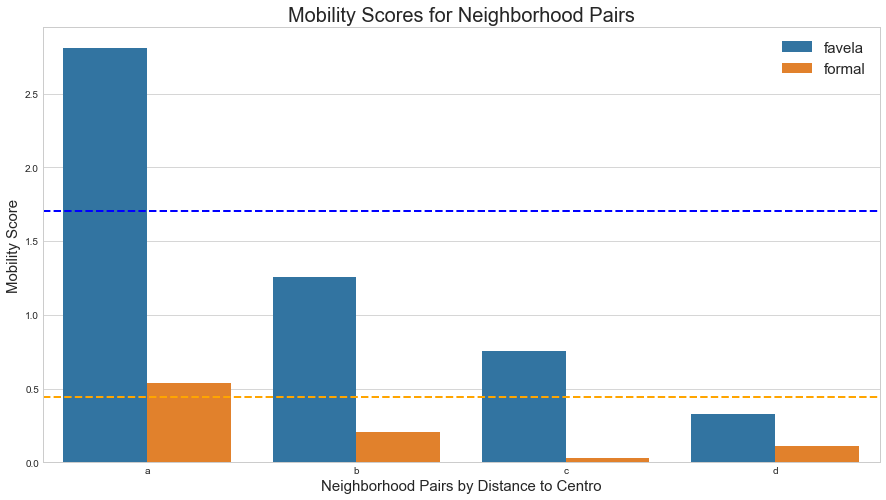

In [46]:
# source: https://seaborn.pydata.org/generated/seaborn.barplot.html

fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.barplot(x="group", y="mobility_score_norm", hue="type", data=mobility_by_city)

plt.title('Mobility Scores for Neighborhood Pairs' ,fontsize=20)
plt.xlabel('Neighborhood Pairs by Distance to Centro', fontsize=15)
plt.ylabel('Mobility Score', fontsize=15)
plt.legend(fontsize=15)

# plotting averages for two groups
plt.axhline(fav_norm/norm_key, color='blue', linestyle='dashed', linewidth=2)
plt.axhline(form_norm/norm_key, color='orange', linestyle='dashed', linewidth=2)


In [49]:
ratio_new = pd.read_csv('ratio_new.csv')
ratio_new

,neighborhood_pair,favela,formal,ratio
0,Cidade de Deus - Tanque,2.808303,0.534917,5.249979
1,Serrinha - Cascadura,1.257357,0.208680,6.025288
2,Vidigal - Leblon,0.753689,0.032037,23.525580
3,Rocinha - Gávea,0.542543,0.112950,4.803391


In [34]:
# geopandas to map spatially coming soon! 

In [47]:
mobility_by_city

,Nome_do_bairro,mobility_score_norm,type,group
0,Cidade de Deus,2.808303,favela,a
1,Tanque,0.534917,formal,a
2,Serrinha,1.257357,favela,b
3,Cascadura,0.208680,formal,b
4,Vidigal,0.753689,favela,c
5,Leblon,0.032037,formal,c
6,Rocinha,0.330834,favela,d
7,Gávea,0.112950,formal,d


In [50]:
rio.columns

Index(['cod_sector_start', 'Cod_bairro', 'type', 'group', 'Nome_do_bairro',
       'travel_time_am', 'walk_time', 'mode_switches', 'price', 'avg_income',
       'tot_residents', 'walk_per', 'wkly_cost_am', 'income_per',
       'mobility_score', 'walk_scale', 'mobility_score_norm'],
      dtype='object')

In [53]:
rio_pretty=rio[['type', 'Nome_do_bairro', 'travel_time_am', 'walk_time', 'walk_scale', 'mode_switches', 'avg_income', 'income_per', 'mobility_score_norm' ]]
rio_pretty

,type,Nome_do_bairro,travel_time_am,walk_time,walk_scale,mode_switches,avg_income,income_per,mobility_score_norm
0,favela,Cidade de Deus,106,4,0.754717,3,532.60,0.140819,2.808303
1,formal,Tanque,66,4,1.212121,2,934.48,0.042269,0.534917
2,favela,Serrinha,70,13,3.714286,2,386.84,0.093062,1.257357
3,formal,Cascadura,54,2,0.740741,1,904.23,0.019906,0.208680
4,favela,Vidigal,68,9,2.647059,2,691.59,0.057115,0.753689
5,formal,Leblon,34,1,0.588235,1,5173.23,0.004156,0.032037
6,favela,Rocinha,67,16,4.776119,2,945.15,0.022748,0.330834
7,formal,Gávea,52,8,3.076923,2,4178.34,0.008616,0.112950


In [55]:
rio_pretty = rio_pretty.rename(columns={'type': 'Community Type', \
                                        'Nome_do_bairro': 'Name', \
                                        'travel_time_am': 'Travel Time', \
                                        'walk_time': 'Walk Time (Min)', \
                                        'walk_scale': 'Scaled Walk No.', \
                                        'mode_switches': 'Mode Switches', \
                                        'avg_income': 'Average Income', \
                                        'income_per': 'Income % - 5 Rides',
                                       'mobility_score_norm': 'Normalized Mobility Score'})

rio_pretty


,Community Type,Name,Travel Time,Walk Time (Min),Scaled Walk No.,Mode Switches,Average Income,Income % - 5 Rides,Normalized Mobility Score
0,favela,Cidade de Deus,106,4,0.754717,3,532.60,0.140819,2.808303
1,formal,Tanque,66,4,1.212121,2,934.48,0.042269,0.534917
2,favela,Serrinha,70,13,3.714286,2,386.84,0.093062,1.257357
3,formal,Cascadura,54,2,0.740741,1,904.23,0.019906,0.208680
4,favela,Vidigal,68,9,2.647059,2,691.59,0.057115,0.753689
5,formal,Leblon,34,1,0.588235,1,5173.23,0.004156,0.032037
6,favela,Rocinha,67,16,4.776119,2,945.15,0.022748,0.330834
7,formal,Gávea,52,8,3.076923,2,4178.34,0.008616,0.112950
